# Number-of-studies-using-the-chronic-condition-in-exclusion-criteria

    - Focus on 18 most common choronic diseases in exclusion criteria
    - Using parsed results from Facebook Clinical-Trial-Parser

## 1.  Importing the parsed result and common chronic disease list

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('./data/ie_parsed_clinical_trials_11272020.tsv',sep='\t')
df.shape

(46714, 9)

In [3]:
df['#nct_id'].nunique()

3380

In [4]:
df.head(2)

,#nct_id,eligibility_type,criterion,label,term,ner_score,concepts,tree_numbers,nel_score
0,NCT04644705,inclusion,Healthy male or female subjects in good health...,word_scores:gender,male female,0.999,Men,M01.390,1.0
1,NCT04644705,inclusion,Healthy male or female subjects in good health...,word_scores:gender,male female,0.999,Women,M01.975,1.0


In [5]:
df = df.drop_duplicates(subset=['#nct_id', 'eligibility_type', 'concepts']).dropna(subset=['concepts']).reset_index(drop=True)

In [6]:
df.shape

(25538, 9)

Importing common chronic disease list

In [9]:
df21 = pd.read_excel('./data/common_disease_list.xlsx')

In [10]:
df21.shape

(18, 3)

## 2. Combining some concepts

#### A-1 Hypertension

In [11]:
df[df.concepts.str.contains('Hypertension')].concepts.value_counts()

Hypertension                                                                                                             189
Hypertension, Pulmonary                                                                                                   41
Hypertension, Portal                                                                                                       9
Intracranial Hypertension                                                                                                  7
Pulmonary Arterial Hypertension                                                                                            5
Hypertension, Pregnancy-Induced                                                                                            2
Hypertension, Malignant                                                                                                    2
Familial Primary Pulmonary Hypertension|Idiopathic Pulmonary Arterial Hypertension|Pulmonary Hypertension, Primary, 1      2


In [12]:
df.concepts = df.concepts.str.replace('.*Hypertension.*','Hypertension',regex=True)

In [13]:
df[df.concepts.str.contains('Hypertension')].concepts.value_counts()

Hypertension    257
Name: concepts, dtype: int64

#### A-2 Hyperlipidemia

In [14]:
df[df.concepts.str.contains('Hyperlipidemia')].concepts.value_counts()

Hyperlipidemias    2
Name: concepts, dtype: int64

#### A-3 Ischemic heart disease

In [15]:
df[df.concepts.str.contains('Ischemic Heart Disease')].concepts.value_counts()

Series([], Name: concepts, dtype: int64)

In [16]:
df[df.concepts.str.contains('Myocardial Ischemia')].concepts.value_counts()

Myocardial Ischemia    27
Name: concepts, dtype: int64

In [17]:
df.concepts = df.concepts.str.replace('Myocardial Ischemia','Ischemic Heart Disease')

In [18]:
df[df.concepts.str.contains('Ischemic Heart Disease')].concepts.value_counts()

Ischemic Heart Disease    27
Name: concepts, dtype: int64

#### A-4 Diabetes

In [19]:
df[df.concepts.str.contains('Diabetes')].concepts.value_counts()

Diabetes Mellitus                                      206
Diabetes Mellitus, Type 1|Diabetes Mellitus, Type 2     36
Diabetes Mellitus, Type 1                                7
Diabetes Mellitus, Type 2                                6
Diabetes Insipidus                                       1
Diabetes, Gestational                                    1
Name: concepts, dtype: int64

In [20]:
df.concepts = df.concepts.replace('.*Diabetes.*','Diabetes',regex=True)

In [21]:
df[df.concepts.str.contains('Diabetes')].concepts.value_counts()

Diabetes    257
Name: concepts, dtype: int64

#### A-5 Anemia

In [22]:
df[df.concepts.str.contains('Anemia')].concepts.value_counts()

Anemia, Sickle Cell              29
Anemia                           28
Anemia, Aplastic                  4
Anemia, Hemolytic, Autoimmune     2
Anemia, Hemolytic                 1
Fanconi Anemia                    1
Name: concepts, dtype: int64

In [23]:
df.concepts = df.concepts.replace('.*Anemia.*','Anemia',regex=True)

In [24]:
df[df.concepts.str.contains('Anemia')].concepts.value_counts()

Anemia    65
Name: concepts, dtype: int64

#### A-6 Chronic kidney disease

In [25]:
df[df.concepts.str.contains('Kidney')].concepts.value_counts()

Chronic Kidney Diseases    162
Kidney                     157
Kidney Failure, Chronic     77
Kidney Failure              68
Kidney Diseases             41
Acute Kidney Injury         20
Kidney Failure, Acute        7
Kidney Transplantation       6
Kidney Calculi               5
Solitary Kidney              1
Name: concepts, dtype: int64

In [26]:
df.concepts = df.concepts.str.replace('Renal Insufficiency, Chronic','Chronic Kidney Diseases',regex=False)

In [27]:
df[df.concepts.str.contains('Chronic Kidney Diseases')].concepts.value_counts()

Chronic Kidney Diseases    163
Name: concepts, dtype: int64

#### A-7 Atrial fibrillation

In [28]:
df[df.concepts.str.contains('Atrial Fibrillation')].concepts.value_counts()

Atrial Fibrillation               30
Paroxysmal Atrial Fibrillation     2
Name: concepts, dtype: int64

#### A-8 Heart failure

In [29]:
df[df.concepts.str.contains('Heart Failure')].concepts.value_counts()

Heart Failure                158
Congestive Heart Failure      87
Heart Failure, Systolic        3
Heart Failure, Diastolic       1
Heart Failure, Left-Sided      1
Name: concepts, dtype: int64

In [30]:
df.concepts = df.concepts.replace('.*Heart Failure.*','Heart Failure',regex=True)

In [31]:
df[df.concepts.str.contains('Heart Failure')].concepts.value_counts()

Heart Failure    250
Name: concepts, dtype: int64

#### A-9 COPD and bronchiectasis

In [32]:
df[df.concepts.str.contains('Pulmonary Disease, Chronic Obstructive')].concepts.value_counts()

Pulmonary Disease, Chronic Obstructive    170
Name: concepts, dtype: int64

In [33]:
df[df.concepts.str.contains('Bronchiectasis')].concepts.value_counts()

Bronchiectasis    13
Name: concepts, dtype: int64

In [34]:
df.concepts = df.concepts.replace('Pulmonary Disease, Chronic Obstructive','COPD_Bronchiectasis',regex=False)

In [35]:
df.concepts = df.concepts.replace('Bronchiectasis','COPD_Bronchiectasis',regex=False)

In [36]:
df[df.concepts.str.contains('COPD_Bronchiectasis')].concepts.value_counts()

COPD_Bronchiectasis    183
Name: concepts, dtype: int64

#### A-10 Rheumatoid arthritis and Osteoarthritis

In [37]:
df[df.concepts.str.contains('Arthritis, Rheumatoid')].concepts.value_counts()

Arthritis, Rheumatoid    32
Name: concepts, dtype: int64

In [38]:
df[df.concepts.str.contains('Osteoarthritis')].concepts.value_counts()

Series([], Name: concepts, dtype: int64)

In [39]:
df.concepts = df.concepts.replace('Arthritis, Rheumatoid','Rheumatoid_Arthritis_Osteoarthritis',regex=False)

In [40]:
df[df.concepts.str.contains('Rheumatoid_Arthritis_Osteoarthritis')].concepts.value_counts()

Rheumatoid_Arthritis_Osteoarthritis    32
Name: concepts, dtype: int64

#### A-11 Acquired hypothyroidism

In [41]:
df[df.concepts.str.contains('Hypothyroidism')].concepts.value_counts()

Hypothyroidism    7
Name: concepts, dtype: int64

In [42]:
df.concepts = df.concepts.replace('Hypothyroidism','Acquired Hypothyroidism',regex=False)

In [43]:
df[df.concepts.str.contains('Acquired Hypothyroidism')].concepts.value_counts()

Acquired Hypothyroidism    7
Name: concepts, dtype: int64

#### A-12  Alzheimer disease and related disorders or senile dementia

In [44]:
df[df.concepts.str.contains('Alzheimer Disease')].concepts.value_counts()

Alzheimer Disease    9
Name: concepts, dtype: int64

In [45]:
df[df.concepts.str.contains('Dementia')].concepts.value_counts()

Dementia                    52
Clinical Dementia Rating     1
Frontotemporal Dementia      1
Name: concepts, dtype: int64

In [46]:
df.concepts = df.concepts.replace('Alzheimer Disease','Alzheimer_Disease_Senile_Dementia',regex=False)

In [47]:
df.concepts = df.concepts.replace('Dementia','Alzheimer_Disease_Senile_Dementia',regex=False)

In [48]:
df[df.concepts.str.contains('Alzheimer_Disease_Senile_Dementia')].concepts.value_counts()

Alzheimer_Disease_Senile_Dementia    61
Name: concepts, dtype: int64

#### A-13  Depression

In [49]:
df[df.concepts.str.contains('Depression')].concepts.value_counts()

Depression                29
Respiratory Depression     1
Name: concepts, dtype: int64

#### A-14 Osteoporosis

In [50]:
df[df.concepts.str.contains('Osteoporosis')].concepts.value_counts()

Osteoporosis    6
Name: concepts, dtype: int64

#### A-15 Asthma

In [51]:
df[df.concepts.str.contains('Asthma')].concepts.value_counts()

Asthma                      152
Asthma, Exercise-Induced      2
Name: concepts, dtype: int64

In [52]:
df.concepts = df.concepts.str.replace('.*Asthma.*','Asthma',regex=True)

In [53]:
df[df.concepts.str.contains('Asthma')].concepts.value_counts()

Asthma    154
Name: concepts, dtype: int64

#### A-16 Cancer

In [57]:
# df22 contains list of terms referring to cancer
df22 = pd.read_excel('./data/common_disease_list.xlsx',sheet_name='Sheet3')

In [58]:
Cancer_word = '|'.join([word for word in df22.Cancer_Type])

In [59]:
df[df.concepts.str.contains(Cancer_word)].concepts.value_counts()

/home/bitmman/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Cancer                                                356
Lymphoma                                               28
Lung Cancer                                            21
Cancer of the Uterine Cervix                           11
Prostate Cancer                                         9
Breast Cancer                                           9
Multiple Myeloma                                        8
Cancer|Carcinoma in Situ                                6
Urinary Bladder Cancer                                  3
Melanoma                                                3
Cancer of Skin                                          3
Cancer of Colon                                         2
Squamous Cell Cancer                                    2
Cancer, Second Primary                                  1
Lymphoma, Large-Cell, Anaplastic                        1
Smoldering Multiple Myeloma                             1
Genitourinary Cancer                                    1
Cancer of Neck

In [60]:
cancer_names = list(df[df.concepts.str.contains(Cancer_word)].concepts.value_counts().keys())

In [61]:
df.concepts = df.concepts.str.replace(f'{Cancer_word}','**Cancer')

In [62]:
df.concepts = df.concepts.str.replace('.*Cancer.*','**Cancer',regex=True)

In [63]:
df[df.concepts.str.contains('Cancer')].concepts.value_counts()

**Cancer    471
Name: concepts, dtype: int64

#### A-17 Stroke

In [64]:
df[df.concepts.str.contains('Stroke')].concepts.value_counts()

Stroke           101
Stroke, Acute      9
Name: concepts, dtype: int64

In [65]:
df.concepts = df.concepts.str.replace('.*Stroke.*','**Stroke',regex=True)

In [66]:
df[df.concepts.str.contains('Stroke')].concepts.value_counts()

**Stroke    110
Name: concepts, dtype: int64

#### A-18 High_Cholesterol

In [67]:
df[df.concepts.str.contains('High Cholesterol')].concepts.value_counts()

Series([], Name: concepts, dtype: int64)

In [68]:
df11 = df[df.eligibility_type == 'inclusion'].reset_index(drop=True)
df12 = df[df.eligibility_type == 'exclusion'].reset_index(drop=True)

## Part B

In [69]:
df21

,Diseases,Disease_name,Concept
0,Hypertension,Hypertension,Hypertension
1,Hyperlipidemia,Hyperlipidemia,Hyperlipidemia
2,Ischemic heart disease,Ischemic_heart_disease,Ischemic Heart Disease
3,Diabetes,Diabetes,Diabetes
4,Anemia,Anemia,Anemia
5,Chronic kidney disease,Chronic_kidney_disease,Chronic Kidney Diseases
6,Atrial fibrillation,Atrial_fibrillation,Atrial Fibrillation
7,Heart failure,Heart_failure,Heart Failure
8,COPD and bronchiectasis,COPD_bronchi,COPD_Bronchiectasis
9,Rheumatoid arthritis and Osteoarthritis,Rheumatoid_arthritis_osteoarthritis,Rheumatoid_Arthritis_Osteoarthritis


In [70]:
df121 = df12[df12.concepts.isin(df21.Concept)].reset_index(drop=True)
df121.head()

,#nct_id,eligibility_type,criterion,label,term,ner_score,concepts,tree_numbers,nel_score
0,NCT04644146,exclusion,"With comorbidities - ex: diabetes, obesity, hy...",word_scores:chronic_disease,diabetes obesity hypertension ischemic heart n...,0.973,Diabetes,C18.452.394.750|C19.246,1.0
1,NCT04644146,exclusion,"With comorbidities - ex: diabetes, obesity, hy...",word_scores:chronic_disease,diabetes obesity hypertension ischemic heart n...,0.973,Hypertension,C14.907.489,1.0
2,NCT04642950,exclusion,Patients who have a disease including bronchia...,word_scores:chronic_disease,bronchial asthma lower respiratory tract infec...,0.947,Asthma,C08.127.108|C08.381.495.108|C08.674.095|C20.54...,1.0
3,NCT04642638,exclusion,"Respiratory diseases (e.g., asthma, chronic ob...",word_scores:chronic_disease,asthma chronic obstructive pulmonary disease,0.971,Asthma,C08.127.108|C08.381.495.108|C08.674.095|C20.54...,1.0
4,NCT04642638,exclusion,"Respiratory diseases (e.g., asthma, chronic ob...",word_scores:chronic_disease,asthma chronic obstructive pulmonary disease,0.971,COPD_Bronchiectasis,C08.381.495.389,1.0


In [71]:
df121.concepts.value_counts()

**Cancer                               376
Heart Failure                          211
Hypertension                           185
Diabetes                               148
Chronic Kidney Diseases                138
COPD_Bronchiectasis                    137
Asthma                                 125
**Stroke                                93
Alzheimer_Disease_Senile_Dementia       58
Anemia                                  56
Rheumatoid_Arthritis_Osteoarthritis     26
Depression                              24
Atrial Fibrillation                     24
Ischemic Heart Disease                  22
Acquired Hypothyroidism                  6
Osteoporosis                             4
Name: concepts, dtype: int64

In [72]:
#This is to display common chronic disease with value 0
dic = df121.concepts.value_counts()

In [73]:
dic['**High Cholesterol'] = 0
dic['Hyperlipidemia'] = 0

In [74]:
dic

**Cancer                               376
Heart Failure                          211
Hypertension                           185
Diabetes                               148
Chronic Kidney Diseases                138
COPD_Bronchiectasis                    137
Asthma                                 125
**Stroke                                93
Alzheimer_Disease_Senile_Dementia       58
Anemia                                  56
Rheumatoid_Arthritis_Osteoarthritis     26
Depression                              24
Atrial Fibrillation                     24
Ischemic Heart Disease                  22
Acquired Hypothyroidism                  6
Osteoporosis                             4
**High Cholesterol                       0
Hyperlipidemia                           0
Name: concepts, dtype: int64

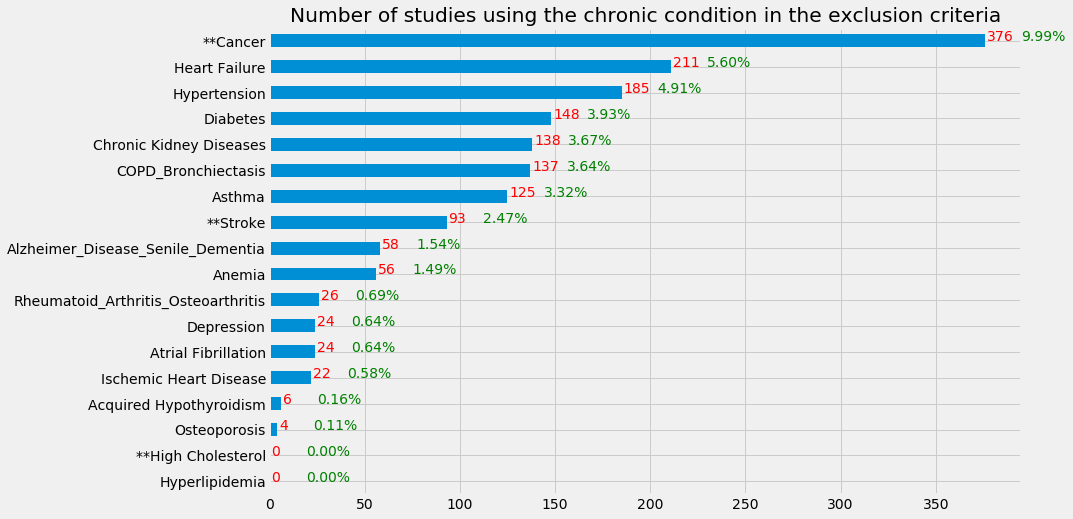

In [77]:
fig1 = plt.figure(figsize=(12,8))
dic.sort_values().plot.barh()
plt.title('Number of studies using the chronic condition in the exclusion criteria')
for i,v in enumerate(dic.sort_values()):
    plt.text(v + 1, i , str(v), color = 'red')
    plt.text(v + 19, i , ("{:.2%}".format(v/3765)), color = 'green')

In [78]:
fig1.savefig("./data/common_disease.png", dpi=300, bbox_inches = "tight")